In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.interpolate import interp1d
import matplotlib.dates as mdates

In [3]:
# Données rapport isotopique

dates_mesures = np.array(['2024-11-04', '2024-12-16', '2025-01-13', '2025-02-14', '2025-03-14', '2025-04-23', '2025-05-19'], dtype='datetime64[D]')

# Bodenquelle 1
O18_bq1 = np.array([-13.43, -13.66, -13.7, -13.7, -13.8, -14.1, -14.2])
H2_bq1 = np.array([-96.74, -98.13, -98.2, -98.9, -99.4, -100.7, -101.9])

# Bodenquelle 2
O18_bq2 = np.array([-13.55, -13.67, -13.7, -13.7, -13.7, -14.0, -14.0])
H2_bq2 = np.array([-97.38, -98.33, -98.2, -99.0, -99.0, -100.8, -100.3])

# Bodenquelle 3
O18_bq3 = np.array([-13.68, -13.63, -13.8, -13.7, -13.8, -13.9, -14.1])
H2_bq3 = np.array([-98.29, -98.33, -99.1, -98.9, -98.9, -99.8, -100.7])

# Bodenquelle 4
O18_bq4 = np.array([-13.63, -13.58, -13.8, -13.7, -13.8, -13.9, -14.1])
H2_bq4 = np.array([-98.28, -98.09, -99.1, -98.4, -98.9, -100.8, -100.6])

# Bodenquelle 5
O18_bq5 = np.array([-13.71, -13.67, -13.8, -13.9, -13.8, -14.0, -14.1])
H2_bq5 = np.array([-98.73, -98.81, -99.5, -99.5, -99.2, -100.9, -100.8])

# Felsenquelle 402
O18_fq402 = np.array([-13.8, -13.85, -13.9, -14.0, -13.9, -14.0, -14.0])
H2_fq402 = np.array([-100.3, -100.10, -100.5, -101.0, -100.1, -101.1, -99.8])

# Flüelabach
O18_fb = np.array([-13.55, -13.56, -13.8, -13.8, -13.8, -13.8, -13.9])
H2_fb = np.array([-96.58, -97.42, -99.5, -99.4, -98.8, -100.3, -99.3])

# Pluie 19.05.25
O18_pluie = np.array([-11.2])
H2_pluie = np.array([-75.9])
# Neige

#Flüelatal
O18_fl1 = np.array([np.nan, np.nan, -18.5, -17.2, -16.6, np.nan])
H2_fl1 = np.array([np.nan, np.nan, -136.1, -130.4, -127.8, np.nan])

O18_fl2 = np.array([np.nan, np.nan, -19.4, -19.6, -20.0, np.nan])
H2_fl2 = np.array([np.nan, np.nan, -140.8, -142.8, -147.6, np.nan])

O18_fl3 = np.array([np.nan, np.nan, np.nan, -18.8, -18.3, np.nan])
H2_fl3 = np.array([np.nan, np.nan, np.nan, -138.9, -135.4, np.nan])

# Bedra 
O18_bd1 = np.array([np.nan, np.nan, -16.8, -17.4, -16.8, np.nan])
H2_bd1 = np.array([np.nan, np.nan, -120.6, -133.2, -130.0, np.nan])

O18_bd2 = np.array([np.nan, np.nan, -18.9, -18.1, -17.6, np.nan])
H2_bd2 = np.array([np.nan, np.nan, -138.7, -132.3, -131.2, np.nan])

O18_bd3 = np.array([np.nan, np.nan, np.nan, -19.3, -18.4, np.nan])
H2_bd3 = np.array([np.nan, np.nan, np.nan, -142.4, -136.5, np.nan])

# Pischa
O18_ps1 = np.array([np.nan, np.nan, -19.5, -16.8, -16.4, np.nan])
H2_ps1 = np.array([np.nan, np.nan, -142.2, -128.9, -125.4, np.nan])

O18_ps2 = np.array([np.nan, np.nan, -18.5, -17.0, -17.2, np.nan])
H2_ps2 = np.array([np.nan, np.nan, -132.0, -128.9, -130.1, np.nan])

O18_ps3 = np.array([np.nan, np.nan, -15.3, -20.4, -18.7, np.nan])
H2_ps3 = np.array([np.nan, np.nan, -101.3, -150.6, -138.3, np.nan])

#Bedra eau Noé moyenne de chaque date de prélèvement (janv-mai)
O18_bd_901 = np.array([-14.2, -14.3, -14.4, -14.4, -14.4])
H2_bd_901 = np.array([-102.3, -103.2, -103.7, -103.7, -103.3])

O18_bd_501 = np.array([-14.4, -14.4, -14.4, -14.5, -14.5])
H2_bd_501 = np.array([-104.0, -104.4, -104.3, -104.7, -105.1])


In [4]:
O18_bq1_moy = np.mean(O18_bq1)
H2_bq1_moy = np.mean(H2_bq1)
O18_bq2_moy = np.mean(O18_bq2)
H2_bq2_moy = np.mean(H2_bq2)
O18_bq3_moy = np.mean(O18_bq3)
H2_bq3_moy = np.mean(H2_bq3)
O18_bq4_moy = np.mean(O18_bq4)
H2_bq4_moy = np.mean(H2_bq4)
O18_bq5_moy = np.mean(O18_bq5)
H2_bq5_moy = np.mean(H2_bq5)
O18_fq402_moy = np.mean(O18_fq402)
H2_fq402_moy = np.mean(H2_fq402)
O18_fb_moy = np.mean(O18_fb)
H2_fb_moy = np.mean(H2_fb)

O18_bd_901_moy = np.mean(O18_bd_901)
H2_bd_901_moy = np.mean(H2_bd_901)
O18_bd_501_moy = np.mean(O18_bd_501)
H2_bd_501_moy = np.mean(H2_bd_501)

In [5]:
#moyenne de neige, chaque mois

#janvier
o18_moy_neige_jan = np.nanmean([O18_bd1[2], O18_bd2[2], O18_bd3[2], O18_fl1[2], O18_fl2[2], O18_fl3[2], O18_ps1[2], O18_ps2[2], O18_ps3[2]])
h2_moy_neige_jan = np.nanmean([H2_bd1[2], H2_bd2[2], H2_bd3[2], H2_fl1[2], H2_fl2[2], H2_fl3[2], H2_ps1[2], H2_ps2[2], H2_ps3[2]])

#février
o18_moy_neige_fev = np.nanmean([O18_bd1[3], O18_bd2[3], O18_bd3[3], O18_fl1[3], O18_fl2[3], O18_fl3[3], O18_ps1[3], O18_ps2[3], O18_ps3[3]])
h2_moy_neige_fev = np.nanmean([H2_bd1[3], H2_bd2[3], H2_bd3[3], H2_fl1[3], H2_fl2[3], H2_fl3[3], H2_ps1[3], H2_ps2[3], H2_ps3[3]])

#mars
o18_moy_neige_mar = np.nanmean([O18_bd1[4], O18_bd2[4], O18_bd3[4], O18_fl1[4], O18_fl2[4], O18_fl3[4], O18_ps1[4], O18_ps2[4], O18_ps3[4]])
h2_moy_neige_mar = np.nanmean([H2_bd1[4], H2_bd2[4], H2_bd3[4], H2_fl1[4], H2_fl2[4], H2_fl3[4], H2_ps1[4], H2_ps2[4], H2_ps3[4]])

In [6]:
# Moyennes pour chaque date à Flüelatal
O18_fl_moy = np.nanmean([O18_fl1, O18_fl2, O18_fl3], axis=0)
H2_fl_moy  = np.nanmean([H2_fl1, H2_fl2, H2_fl3], axis=0)

# Moyennes pour chaque date à Bedra
O18_bd_moy = np.nanmean([O18_bd1, O18_bd2, O18_bd3], axis=0)
H2_bd_moy  = np.nanmean([H2_bd1, H2_bd2, H2_bd3], axis=0)

# Moyennes pour chaque date à Pischa
O18_fl_moy = np.nanmean([O18_ps1, O18_ps2, O18_ps3], axis=0)
H2_fl_moy  = np.nanmean([H2_ps1, H2_ps2, H2_ps3], axis=0)

print(O18_fl_moy)
print(H2_fl_moy)

[         nan          nan -17.76666667 -18.06666667 -17.43333333
          nan]
[          nan           nan -125.16666667 -136.13333333 -131.26666667
           nan]


C:\Users\axela\AppData\Local\Temp\ipykernel_20512\1553110721.py:2: RuntimeWarning: Mean of empty slice
  O18_fl_moy = np.nanmean([O18_fl1, O18_fl2, O18_fl3], axis=0)
C:\Users\axela\AppData\Local\Temp\ipykernel_20512\1553110721.py:3: RuntimeWarning: Mean of empty slice
  H2_fl_moy  = np.nanmean([H2_fl1, H2_fl2, H2_fl3], axis=0)
C:\Users\axela\AppData\Local\Temp\ipykernel_20512\1553110721.py:6: RuntimeWarning: Mean of empty slice
  O18_bd_moy = np.nanmean([O18_bd1, O18_bd2, O18_bd3], axis=0)
C:\Users\axela\AppData\Local\Temp\ipykernel_20512\1553110721.py:7: RuntimeWarning: Mean of empty slice
  H2_bd_moy  = np.nanmean([H2_bd1, H2_bd2, H2_bd3], axis=0)
C:\Users\axela\AppData\Local\Temp\ipykernel_20512\1553110721.py:10: RuntimeWarning: Mean of empty slice
  O18_fl_moy = np.nanmean([O18_ps1, O18_ps2, O18_ps3], axis=0)
C:\Users\axela\AppData\Local\Temp\ipykernel_20512\1553110721.py:11: RuntimeWarning: Mean of empty slice
  H2_fl_moy  = np.nanmean([H2_ps1, H2_ps2, H2_ps3], axis=0)


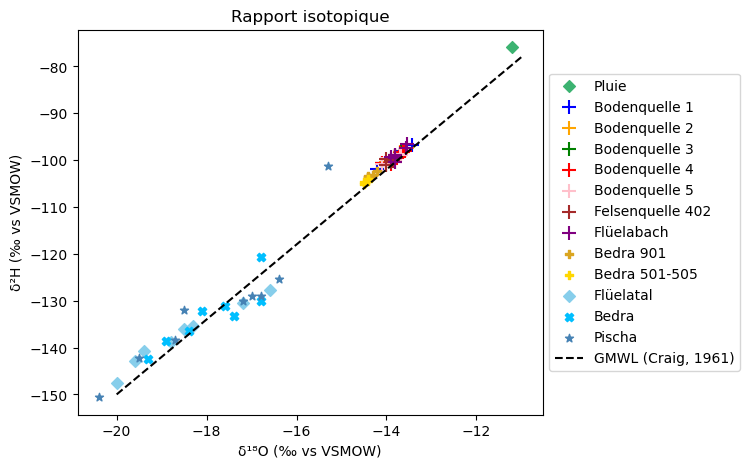

In [7]:
plt.figure(figsize=(6,5))

#Pluie
plt.scatter(O18_pluie, H2_pluie,marker = 'D', color='mediumseagreen', label='Pluie')

# Bodenquellen
plt.scatter(O18_bq1, H2_bq1, marker='+', s=110, color='blue', label="Bodenquelle 1")
plt.scatter(O18_bq2, H2_bq2, marker='+', s=110, color='orange', label="Bodenquelle 2")
plt.scatter(O18_bq3, H2_bq3, marker='+', s=110, color='green', label="Bodenquelle 3")
plt.scatter(O18_bq4, H2_bq4, marker='+', s=110, color='red', label="Bodenquelle 4")
plt.scatter(O18_bq5, H2_bq5, marker='+', s=110, color='pink', label="Bodenquelle 5")
plt.scatter(O18_fq402, H2_fq402, marker='+', s=110, color='brown', label="Felsenquelle 402")
plt.scatter(O18_fb, H2_fb, marker='+', s=110, color='purple', label="Flüelabach")

#Bedra Noe
plt.scatter(O18_bd_901, H2_bd_901, marker='P', color='goldenrod', label='Bedra 901')
plt.scatter(O18_bd_501, H2_bd_501, marker='P', color='gold', label='Bedra 501-505')


#Neige
#plt.scatter(O18_fl_moy, H2_fl_moy, marker='D', color='skyblue', label="Neige Flüelatal (moy.)")
plt.scatter(O18_fl1, H2_fl1, marker='D', color='skyblue', label="Flüelatal" )
plt.scatter(O18_fl2, H2_fl2, marker='D', color='skyblue' )
plt.scatter(O18_fl3, H2_fl3, marker='D', color='skyblue')

plt.scatter(O18_bd1, H2_bd1, marker='X', color='deepskyblue', label="Bedra" )
plt.scatter(O18_bd2, H2_bd2, marker='X', color='deepskyblue')
plt.scatter(O18_bd3, H2_bd3, marker='X', color='deepskyblue')

plt.scatter(O18_ps1, H2_ps1, marker='*', color='steelblue', label="Pischa" )
plt.scatter(O18_ps2, H2_ps2, marker='*', color='steelblue')
plt.scatter(O18_ps3, H2_ps3, marker='*', color='steelblue')

#plt.scatter(o18_moy_neige_jan, h2_moy_neige_jan, marker='o', color='red', label='Neige Jan')
#plt.scatter(o18_moy_neige_fev, h2_moy_neige_fev, marker='o', color='blue', label='Neige Fev')
#plt.scatter(o18_moy_neige_mar, h2_moy_neige_mar, marker='o', color='green', label='Neige Mar')

# Global Meteoric Water Line
x = np.linspace(-20.0, -11, 200)
plt.plot(x, 8*x + 10, 'k--', label='GMWL (Craig, 1961)')


plt.xlabel("δ¹⁸O (‰ vs VSMOW)")
plt.ylabel("δ²H (‰ vs VSMOW)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.grid(True)
plt.title("Rapport isotopique")

#plt.savefig('isotopes_tot_avec_bedra_neigeloc.png', dpi=300, bbox_inches='tight')
plt.show()


In [8]:
print(O18_fl2[2])

-19.4


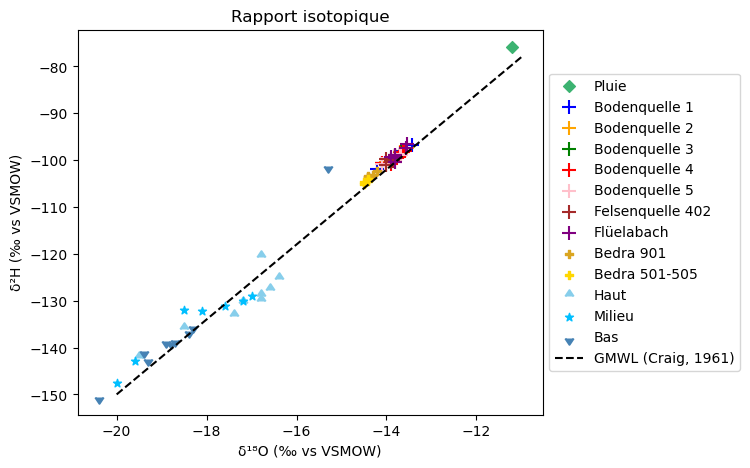

In [9]:
plt.figure(figsize=(6,5))

#pluie
plt.scatter(O18_pluie, H2_pluie,marker = 'D', color='mediumseagreen', label='Pluie')

# Bodenquellen
plt.scatter(O18_bq1, H2_bq1, marker='+', s=110, color='blue', label="Bodenquelle 1")
plt.scatter(O18_bq2, H2_bq2, marker='+', s=110, color='orange', label="Bodenquelle 2")
plt.scatter(O18_bq3, H2_bq3, marker='+', s=110, color='green', label="Bodenquelle 3")
plt.scatter(O18_bq4, H2_bq4, marker='+', s=110, color='red', label="Bodenquelle 4")
plt.scatter(O18_bq5, H2_bq5, marker='+', s=110, color='pink', label="Bodenquelle 5")
plt.scatter(O18_fq402, H2_fq402, marker='+', s=110, color='brown', label="Felsenquelle 402")
plt.scatter(O18_fb, H2_fb, marker='+', s=110, color='purple', label="Flüelabach")

#Bedra Noe
plt.scatter(O18_bd_901, H2_bd_901, marker='P', color='goldenrod', label='Bedra 901')
plt.scatter(O18_bd_501, H2_bd_501, marker='P', color='gold', label='Bedra 501-505')

#Neige
#Haut de la carotte : fl1, bd1, ps1
plt.scatter(O18_fl1, H2_fl1, marker=10, color='skyblue', label="Haut" )
plt.scatter(O18_bd1, H2_bd1, marker=10, color='skyblue')
plt.scatter(O18_ps1, H2_ps1, marker=10, color='skyblue')

#Milieu de la carotte : fl2[3, 4], bd2[3, 4], ps2
plt.scatter(O18_fl2[3:5], H2_fl2[3:5], marker='*', color='deepskyblue', label='Milieu' )
plt.scatter(O18_bd2[3:5], H2_bd2[3:5], marker='*', color='deepskyblue')
plt.scatter(O18_ps2, H2_ps2, marker='*', color='deepskyblue')

#Bas de la carotte : fl2[2], bd2[2], fl3, bd3, ps3
plt.scatter(O18_fl2[2], H2_fl2[2], marker=11, color='steelblue', label='Bas' )
plt.scatter(O18_bd2[2], H2_bd2[2], marker=11, color='steelblue')
plt.scatter(O18_fl3, H2_fl3, marker=11, color='steelblue')
plt.scatter(O18_bd3, H2_bd3, marker=11, color='steelblue')
plt.scatter(O18_ps3, H2_ps3, marker=11, color='steelblue')

#plt.scatter(o18_moy_neige_jan, h2_moy_neige_jan, marker='o', color='red', label='Neige Jan')
#plt.scatter(o18_moy_neige_fev, h2_moy_neige_fev, marker='o', color='blue', label='Neige Fev')
#plt.scatter(o18_moy_neige_mar, h2_moy_neige_mar, marker='o', color='green', label='Neige Mar')

# Global Meteoric Water Line
x = np.linspace(-20.0, -11, 200)
plt.plot(x, 8*x + 10, 'k--', label='GMWL (Craig, 1961)')


plt.xlabel("δ¹⁸O (‰ vs VSMOW)")
plt.ylabel("δ²H (‰ vs VSMOW)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.grid(True)
plt.title("Rapport isotopique")

plt.savefig('isotopes_tot_avec_bedra_neige_pos_carotte.png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\axela\AppData\Local\Temp\ipykernel_20512\3352756335.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


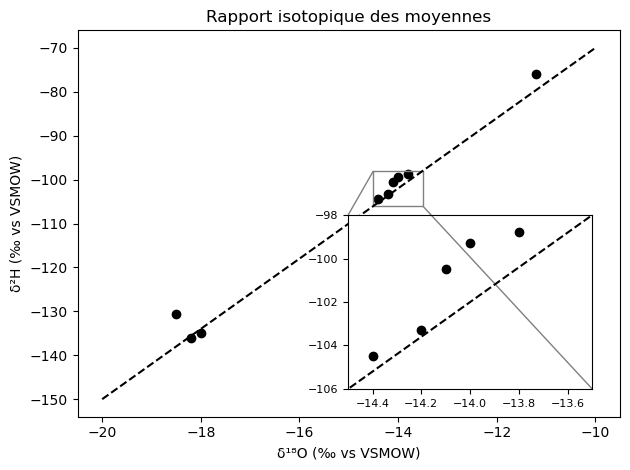

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

# Exemple de données représentatives
x = [-11.2, -13.8, -14.0, -14.1, -14.2, -14.4, -18.5, -18.2, -18.0]
y = [-76.0, -98.8, -99.3, -100.5, -103.3, -104.5, -130.5, -136.0, -135.0]

fig, ax = plt.subplots()

# Graphe principal
ax.scatter(x, y, c='k')
ax.set_title("Rapport isotopique des moyennes")
ax.set_xlabel("δ¹⁸O (‰ vs VSMOW)")
ax.set_ylabel("δ²H (‰ vs VSMOW)")

# Droite GMWL
x_gmwl = [-20, -10]
y_gmwl = [8*x + 10 for x in x_gmwl]
ax.plot(x_gmwl, y_gmwl, 'k--', label="GMWL (Craig, 1961)")

# Zone zoomée (inset)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
axins = inset_axes(ax, width="45%", height="45%", loc='lower right', borderpad=2)
axins.scatter(x, y, c='k')
axins.plot(x_gmwl, y_gmwl, 'k--')

# Limites du zoom
x1, x2 = -14.5, -13.5
y1, y2 = -106, -98
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Optionnel : désactiver les ticks pour la lisibilité
axins.tick_params(axis='both', which='both', labelsize=8)

# Relier visuellement les deux zones
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.show()


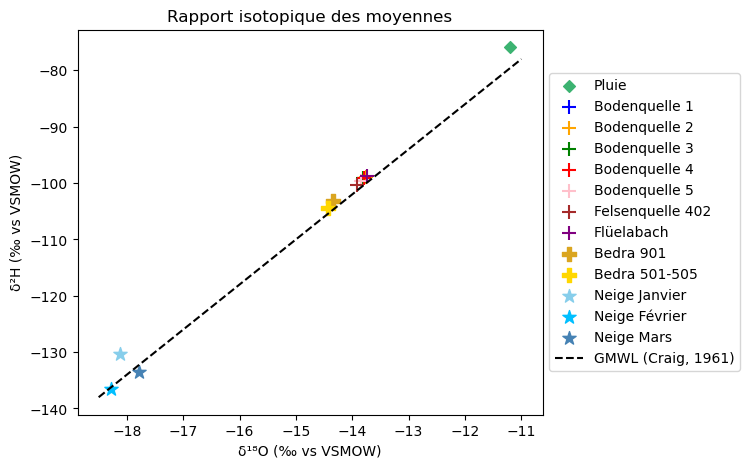

In [11]:
plt.figure(figsize=(6,5))

#pluie
plt.scatter(O18_pluie, H2_pluie,marker = 'D', color='mediumseagreen', label='Pluie')

# Bodenquellen
plt.scatter(O18_bq1_moy, H2_bq1_moy, marker='+', s=110, color='blue', label="Bodenquelle 1")
plt.scatter(O18_bq2_moy, H2_bq2_moy, marker='+', s=110, color='orange', label="Bodenquelle 2")
plt.scatter(O18_bq3_moy, H2_bq3_moy, marker='+', s=110, color='green', label="Bodenquelle 3")
plt.scatter(O18_bq4_moy, H2_bq4_moy, marker='+', s=110, color='red', label="Bodenquelle 4")
plt.scatter(O18_bq5_moy, H2_bq5_moy, marker='+', s=110, color='pink', label="Bodenquelle 5")
plt.scatter(O18_fq402_moy, H2_fq402_moy, marker='+', s=110, color='brown', label="Felsenquelle 402")

#Flüelabach
plt.scatter(O18_fb_moy, H2_fb_moy, marker='+', s=110, color='purple', label="Flüelabach")

#Bedra Noe
plt.scatter(O18_bd_901_moy, H2_bd_901_moy, marker='P', s=100, color='goldenrod', label='Bedra 901')
plt.scatter(O18_bd_501_moy, H2_bd_501_moy, marker='P', s=100, color='gold', label='Bedra 501-505')

#Neige

plt.scatter(o18_moy_neige_jan, h2_moy_neige_jan, marker='*', s=100, color='skyblue', label='Neige Janvier')
plt.scatter(o18_moy_neige_fev, h2_moy_neige_fev, marker='*', s=100, color='deepskyblue', label='Neige Février')
plt.scatter(o18_moy_neige_mar, h2_moy_neige_mar, marker='*', s=100, color='steelblue', label='Neige Mars')

# Global Meteoric Water Line
x = np.linspace(-18.5, -11, 200)
plt.plot(x, 8*x + 10, 'k--', label='GMWL (Craig, 1961)')


plt.xlabel("δ¹⁸O (‰ vs VSMOW)")
plt.ylabel("δ²H (‰ vs VSMOW)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.grid(True)
plt.title("Rapport isotopique des moyennes")

#plt.savefig('isotopes_moyennes_avec_bedra.png', dpi=300, bbox_inches='tight')
plt.show()

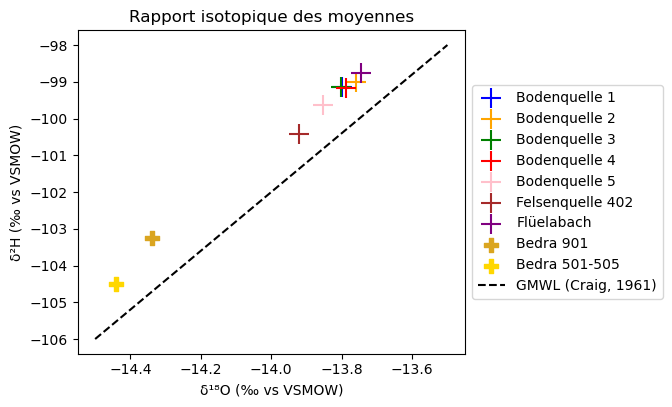

In [12]:
plt.figure(figsize=(5,4.2))


# Bodenquellen
plt.scatter(O18_bq1_moy, H2_bq1_moy, marker='+', s=200, color='blue', label="Bodenquelle 1")
plt.scatter(O18_bq2_moy, H2_bq2_moy, marker='+', s=200, color='orange', label="Bodenquelle 2")
plt.scatter(O18_bq3_moy, H2_bq3_moy, marker='+', s=200, color='green', label="Bodenquelle 3")
plt.scatter(O18_bq4_moy, H2_bq4_moy, marker='+', s=200, color='red', label="Bodenquelle 4")
plt.scatter(O18_bq5_moy, H2_bq5_moy, marker='+', s=200, color='pink', label="Bodenquelle 5")
plt.scatter(O18_fq402_moy, H2_fq402_moy, marker='+', s=200, color='brown', label="Felsenquelle 402")

#Flüelabach
plt.scatter(O18_fb_moy, H2_fb_moy, marker='+', s=200, color='purple', label="Flüelabach")

#Bedra Noe
plt.scatter(O18_bd_901_moy, H2_bd_901_moy, marker='P', s=100, color='goldenrod', label='Bedra 901')
plt.scatter(O18_bd_501_moy, H2_bd_501_moy, marker='P', s=100, color='gold', label='Bedra 501-505')


# Global Meteoric Water Line
x = np.linspace(-14.50, -13.50, 200)
plt.plot(x, 8*x + 10, 'k--', label='GMWL (Craig, 1961)')


plt.xlabel("δ¹⁸O (‰ vs VSMOW)")
plt.ylabel("δ²H (‰ vs VSMOW)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.grid(True)
plt.title("Rapport isotopique des moyennes")

#plt.savefig('isotopes_moyennes_zoom_avec_bedra.png', dpi=300, bbox_inches='tight')
plt.show()

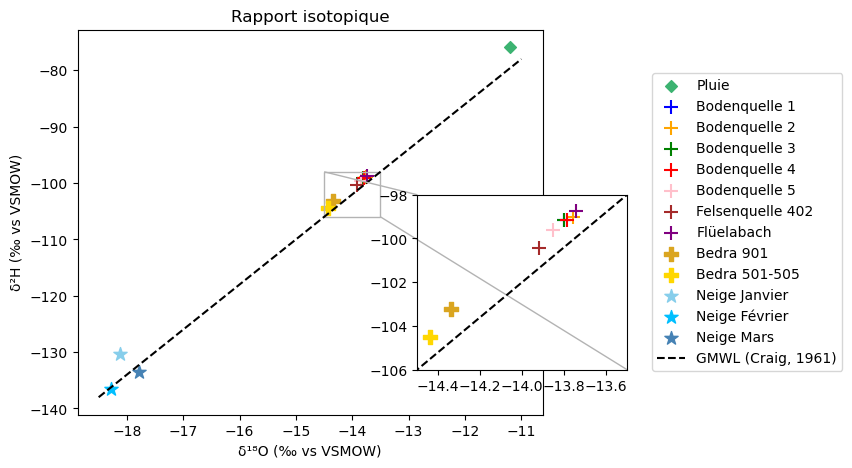

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

fig, ax = plt.subplots(figsize=(6,5))

# pluie
ax.scatter(O18_pluie, H2_pluie, marker='D', color='mediumseagreen', label='Pluie')

# Bodenquellen
ax.scatter(O18_bq1_moy, H2_bq1_moy, marker='+', s=110, color='blue', label="Bodenquelle 1")
ax.scatter(O18_bq2_moy, H2_bq2_moy, marker='+', s=110, color='orange', label="Bodenquelle 2")
ax.scatter(O18_bq3_moy, H2_bq3_moy, marker='+', s=110, color='green', label="Bodenquelle 3")
ax.scatter(O18_bq4_moy, H2_bq4_moy, marker='+', s=110, color='red', label="Bodenquelle 4")
ax.scatter(O18_bq5_moy, H2_bq5_moy, marker='+', s=110, color='pink', label="Bodenquelle 5")
ax.scatter(O18_fq402_moy, H2_fq402_moy, marker='+', s=110, color='brown', label="Felsenquelle 402")

# Flüelabach
ax.scatter(O18_fb_moy, H2_fb_moy, marker='+', s=110, color='purple', label="Flüelabach")

# Bedra Noe
ax.scatter(O18_bd_901_moy, H2_bd_901_moy, marker='P', s=100, color='goldenrod', label='Bedra 901')
ax.scatter(O18_bd_501_moy, H2_bd_501_moy, marker='P', s=100, color='gold', label='Bedra 501-505')

# Neige
ax.scatter(o18_moy_neige_jan, h2_moy_neige_jan, marker='*', s=100, color='skyblue', label='Neige Janvier')
ax.scatter(o18_moy_neige_fev, h2_moy_neige_fev, marker='*', s=100, color='deepskyblue', label='Neige Février')
ax.scatter(o18_moy_neige_mar, h2_moy_neige_mar, marker='*', s=100, color='steelblue', label='Neige Mars')

# GMWL
x = np.linspace(-18.5, -11, 200)
ax.plot(x, 8*x + 10, 'k--', label='GMWL (Craig, 1961)')

# Légendes et titre
ax.set_xlabel("δ¹⁸O (‰ vs VSMOW)")
ax.set_ylabel("δ²H (‰ vs VSMOW)")
ax.set_title("Rapport isotopique")
ax.legend(loc='center left', bbox_to_anchor=(1.22, 0.5))

#Zoom
# Coordonnées normalisées sur la figure pour faire dépasser à droite
axins = inset_axes(ax,
                   width="50%", height="50%",
                   bbox_to_anchor=(0.341, -0.15, 0.7, 0.7),  # (x0, y0, width, height) relatif à la figure
                   bbox_transform=fig.transFigure,
                   borderpad=0)

# Copier les mêmes points dans le zoom
axins.scatter(O18_bq1_moy, H2_bq1_moy, marker='+', s=110, color='blue')
axins.scatter(O18_bq2_moy, H2_bq2_moy, marker='+', s=110, color='orange')
axins.scatter(O18_bq3_moy, H2_bq3_moy, marker='+', s=110, color='green')
axins.scatter(O18_bq4_moy, H2_bq4_moy, marker='+', s=110, color='red')
axins.scatter(O18_bq5_moy, H2_bq5_moy, marker='+', s=110, color='pink')
axins.scatter(O18_fq402_moy, H2_fq402_moy, marker='+', s=110, color='brown')
axins.scatter(O18_fb_moy, H2_fb_moy, marker='+', s=110, color='purple')
axins.scatter(O18_bd_901_moy, H2_bd_901_moy, marker='P', s=100, color='goldenrod')
axins.scatter(O18_bd_501_moy, H2_bd_501_moy, marker='P', s=100, color='gold')

# GMWL dans le zoom
x_zoom = np.linspace(-14.6, -13.5, 100)
axins.plot(x_zoom, 8*x_zoom + 10, 'k--')

# Définir les limites du zoom
axins.set_xlim(-14.5, -13.5)
axins.set_ylim(-106, -98)

# Marquer la zone zoomée
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.7")

#plt.tight_layout()
#plt.savefig('isotopes_moyennes_zoom_cadre2.png', dpi=300, bbox_inches='tight')
plt.show()


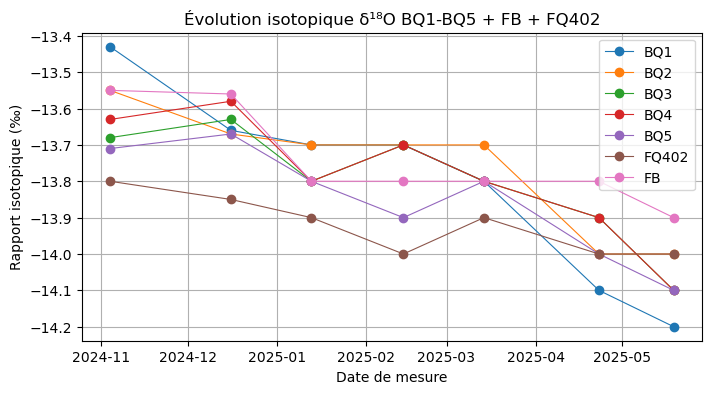

In [14]:
plt.figure(figsize=(8, 4))

plt.plot(dates_mesures, O18_bq1, marker='o',lw=0.8, label='BQ1')
plt.plot(dates_mesures, O18_bq2, marker='o',lw=0.8, label='BQ2')
plt.plot(dates_mesures, O18_bq3, marker='o',lw=0.8, label='BQ3')
plt.plot(dates_mesures, O18_bq4, marker='o',lw=0.8, label='BQ4')
plt.plot(dates_mesures, O18_bq5, marker='o',lw=0.8, label='BQ5')
plt.plot(dates_mesures, O18_fq402, marker='o',lw=0.8, label='FQ402')
plt.plot(dates_mesures, O18_fb, marker='o',lw=0.8, label='FB')

plt.xlabel("Date de mesure")
plt.ylabel("Rapport isotopique (‰)")
plt.title("Évolution isotopique δ¹⁸O BQ1-BQ5 + FB + FQ402")
plt.legend()
plt.grid(True)
plt.show()


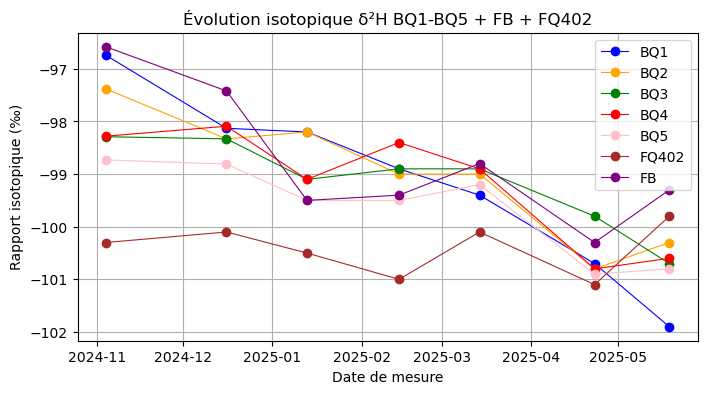

In [15]:
plt.figure(figsize=(8,4))

plt.plot(dates_mesures, H2_bq1, marker='o', lw=0.8, color='blue', label='BQ1')
plt.plot(dates_mesures, H2_bq2, marker='o', lw=0.8, color='orange', label='BQ2')
plt.plot(dates_mesures, H2_bq3, marker='o', lw=0.8, color='green', label='BQ3')
plt.plot(dates_mesures, H2_bq4, marker='o', lw=0.8, color='red', label='BQ4')
plt.plot(dates_mesures, H2_bq5, marker='o', lw=0.8, color='pink', label='BQ5')
plt.plot(dates_mesures, H2_fq402, marker='o', lw=0.8, color='brown', label='FQ402')
plt.plot(dates_mesures, H2_fb, marker='o', lw=0.8, color='purple', label='FB')

plt.xlabel("Date de mesure")
plt.ylabel("Rapport isotopique (‰)")
plt.title("Évolution isotopique δ²H BQ1-BQ5 + FB + FQ402")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\axela\AppData\Local\Temp\ipykernel_20512\423870951.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


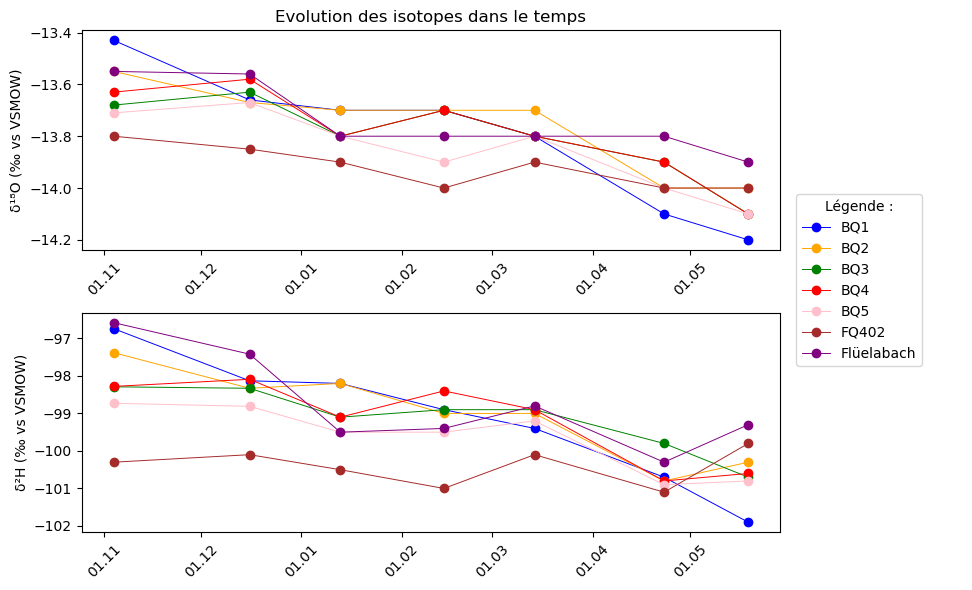

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

axes[0].plot(dates_mesures, O18_bq1, marker='o',lw=0.7, color='blue', label='BQ1')
axes[0].plot(dates_mesures, O18_bq2, marker='o',lw=0.7, color='orange', label='BQ2')
axes[0].plot(dates_mesures, O18_bq3, marker='o',lw=0.7, color='green', label='BQ3')
axes[0].plot(dates_mesures, O18_bq4, marker='o',lw=0.7, color='red', label='BQ4')
axes[0].plot(dates_mesures, O18_bq5, marker='o',lw=0.7, color='pink', label='BQ5')
axes[0].plot(dates_mesures, O18_fq402, marker='o',lw=0.7, color='brown', label='FQ402')
axes[0].plot(dates_mesures, O18_fb, marker='o',lw=0.7, color='purple', label='Flüelabach')
axes[0].set_title('Evolution des isotopes dans le temps')
axes[0].set_ylabel('δ¹⁸O (‰ vs VSMOW)')

axes[1].plot(dates_mesures, H2_bq1, marker='o', lw=0.7, color='blue', label='BQ1')
axes[1].plot(dates_mesures, H2_bq2, marker='o', lw=0.7, color='orange', label='BQ2')
axes[1].plot(dates_mesures, H2_bq3, marker='o', lw=0.7, color='green', label='BQ3')
axes[1].plot(dates_mesures, H2_bq4, marker='o', lw=0.7, color='red', label='BQ4')
axes[1].plot(dates_mesures, H2_bq5, marker='o', lw=0.7, color='pink', label='BQ5')
axes[1].plot(dates_mesures, H2_fq402, marker='o', lw=0.7, color='brown', label='FQ402')
axes[1].plot(dates_mesures, H2_fb, marker='o', lw=0.7, color='purple', label='Flüelabach')
axes[1].set_ylabel('δ²H (‰ vs VSMOW)')

for ax in axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
    ax.tick_params(axis='x', rotation=45)
    ax.xaxis.set_tick_params(labelbottom=True)

ax_legende = fig.add_axes([0.95, 0.5, 0.26, 0.18])  # à ajuster selon ta mise en page
ax_legende.axis('off')  # cacher les axes

# Récupérer les handles une fois
handles, labels = axes[0].get_legend_handles_labels()

# Afficher la légende dans l'axe vide
ax_legende.legend(handles, labels, loc='center', frameon=False)

# Afficher la légende avec encadrement, titre et colonnes
ax_legende.legend(
    handles,
    labels,
    loc='upper center',
    frameon=True,
    ncol=1,
    title='Légende :'
)


plt.tight_layout()
#plt.savefig('evolution_istopes_separe.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\axela\AppData\Local\Temp\ipykernel_20512\1084576712.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


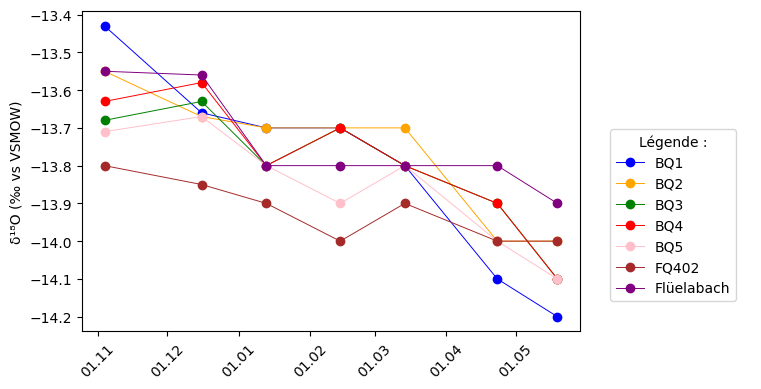

In [45]:
fig, ax = plt.subplots(figsize=(6, 4))

# Données regroupées pour éviter les répétitions
series = [
    (O18_bq1, 'blue', 'BQ1'),
    (O18_bq2, 'orange', 'BQ2'),
    (O18_bq3, 'green', 'BQ3'),
    (O18_bq4, 'red', 'BQ4'),
    (O18_bq5, 'pink', 'BQ5'),
    (O18_fq402, 'brown', 'FQ402'),
    (O18_fb, 'purple', 'Flüelabach')
]

for data, color, label in series:
    ax.plot(dates_mesures, data, marker='o', lw=0.7, color=color, label=label)

#ax.set_title('Evolution des isotopes dans le temps')
ax.set_ylabel('δ¹⁸O (‰ vs VSMOW)')

# Formatage de l'axe des dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax.tick_params(axis='x', rotation=45)

# Légende séparée
ax_legende = fig.add_axes([1, 0.5, 0.26, 0.18])
ax_legende.axis('off')
handles, labels = ax.get_legend_handles_labels()
ax_legende.legend(handles, labels, loc='upper center', frameon=True, ncol=1, title='Légende :')

plt.tight_layout()
plt.show()


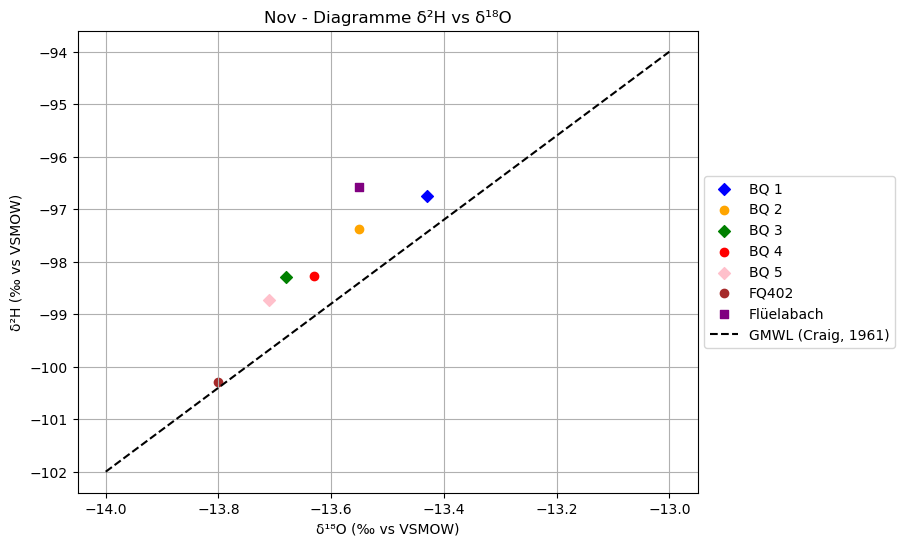

In [17]:
plt.figure(figsize=(8,6))

# Plot pour chaque source
plt.scatter(O18_bq1[0], H2_bq1[0], color='blue', marker='D', label="BQ 1")
plt.scatter(O18_bq2[0], H2_bq2[0], color='orange', label="BQ 2")
plt.scatter(O18_bq3[0], H2_bq3[0], color='green', marker='D', label="BQ 3")
plt.scatter(O18_bq4[0], H2_bq4[0], color='red', label="BQ 4")
plt.scatter(O18_bq5[0], H2_bq5[0], color='pink', marker='D', label="BQ 5")
plt.scatter(O18_fq402[0], H2_fq402[0], color='brown', label="FQ402")
plt.scatter(O18_fb[0], H2_fb[0], color='purple', marker='s', label="Flüelabach")

# Global Meteoric Water Line
x = np.linspace(-14.0, -13.0, 100)
plt.plot(x, 8*x + 10, 'k--', label='GMWL (Craig, 1961)')


plt.xlabel("δ¹⁸O (‰ vs VSMOW)")
plt.ylabel("δ²H (‰ vs VSMOW)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.title("Nov - Diagramme δ²H vs δ¹⁸O")

#plt.savefig('isotopes_nov-mars.png', dpi=300, bbox_inches='tight')
plt.show()

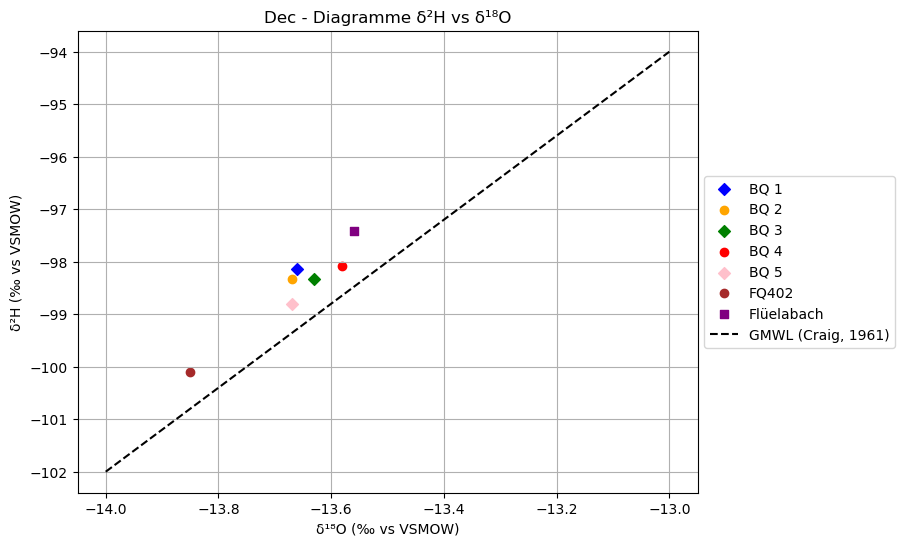

In [18]:
plt.figure(figsize=(8,6))

# Plot pour chaque source
plt.scatter(O18_bq1[1], H2_bq1[1], color='blue', marker='D', label="BQ 1")
plt.scatter(O18_bq2[1], H2_bq2[1], color='orange', label="BQ 2")
plt.scatter(O18_bq3[1], H2_bq3[1], color='green', marker='D', label="BQ 3")
plt.scatter(O18_bq4[1], H2_bq4[1], color='red', label="BQ 4")
plt.scatter(O18_bq5[1], H2_bq5[1], color='pink', marker='D', label="BQ 5")
plt.scatter(O18_fq402[1], H2_fq402[1], color='brown', label="FQ402")
plt.scatter(O18_fb[1], H2_fb[1], color='purple', marker='s', label="Flüelabach")

# Global Meteoric Water Line
x = np.linspace(-14.0, -13.0, 100)
plt.plot(x, 8*x + 10, 'k--', label='GMWL (Craig, 1961)')


plt.xlabel("δ¹⁸O (‰ vs VSMOW)")
plt.ylabel("δ²H (‰ vs VSMOW)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.title("Dec - Diagramme δ²H vs δ¹⁸O")

#plt.savefig('isotopes_nov-mars.png', dpi=300, bbox_inches='tight')
plt.show()

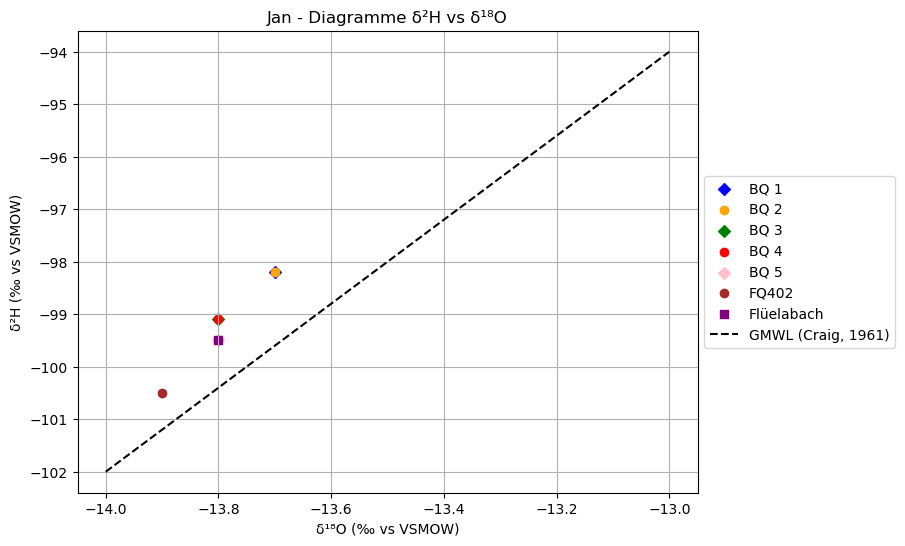

In [19]:
plt.figure(figsize=(8,6))

# Plot pour chaque source
plt.scatter(O18_bq1[2], H2_bq1[2], color='blue',marker='D', label="BQ 1")
plt.scatter(O18_bq2[2], H2_bq2[2], color='orange', label="BQ 2")
plt.scatter(O18_bq3[2], H2_bq3[2], color='green',marker='D', label="BQ 3")
plt.scatter(O18_bq4[2], H2_bq4[2], color='red', label="BQ 4")
plt.scatter(O18_bq5[2], H2_bq5[2], color='pink',marker='D', label="BQ 5")
plt.scatter(O18_fq402[2], H2_fq402[2], color='brown', label="FQ402")
plt.scatter(O18_fb[2], H2_fb[2], color='purple', marker='s', label="Flüelabach")

# Global Meteoric Water Line
x = np.linspace(-14.0, -13.0, 100)
plt.plot(x, 8*x + 10, 'k--', label='GMWL (Craig, 1961)')


plt.xlabel("δ¹⁸O (‰ vs VSMOW)")
plt.ylabel("δ²H (‰ vs VSMOW)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.title("Jan - Diagramme δ²H vs δ¹⁸O")

#plt.savefig('isotopes_nov-mars.png', dpi=300, bbox_inches='tight')
plt.show()

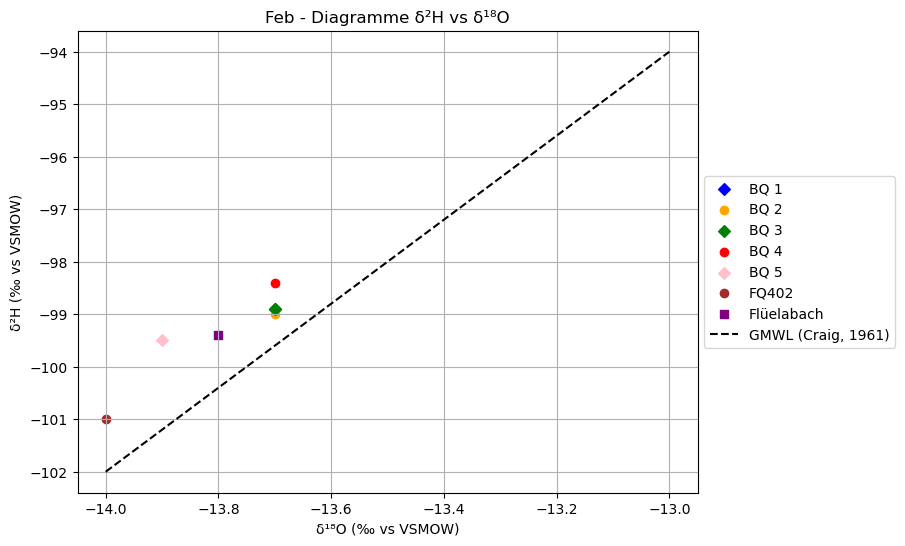

In [20]:
plt.figure(figsize=(8,6))

# Plot pour chaque source
plt.scatter(O18_bq1[3], H2_bq1[3], color='blue',marker='D', label="BQ 1")
plt.scatter(O18_bq2[3], H2_bq2[3], color='orange', label="BQ 2")
plt.scatter(O18_bq3[3], H2_bq3[3], color='green',marker='D', label="BQ 3")
plt.scatter(O18_bq4[3], H2_bq4[3], color='red', label="BQ 4")
plt.scatter(O18_bq5[3], H2_bq5[3], color='pink',marker='D', label="BQ 5")
plt.scatter(O18_fq402[3], H2_fq402[3], color='brown', label="FQ402")
plt.scatter(O18_fb[3], H2_fb[3], color='purple', marker='s', label="Flüelabach")

# Global Meteoric Water Line
x = np.linspace(-14.0, -13.0, 100)
plt.plot(x, 8*x + 10, 'k--', label='GMWL (Craig, 1961)')


plt.xlabel("δ¹⁸O (‰ vs VSMOW)")
plt.ylabel("δ²H (‰ vs VSMOW)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.title("Feb - Diagramme δ²H vs δ¹⁸O")

#plt.savefig('isotopes_nov-mars.png', dpi=300, bbox_inches='tight')
plt.show()

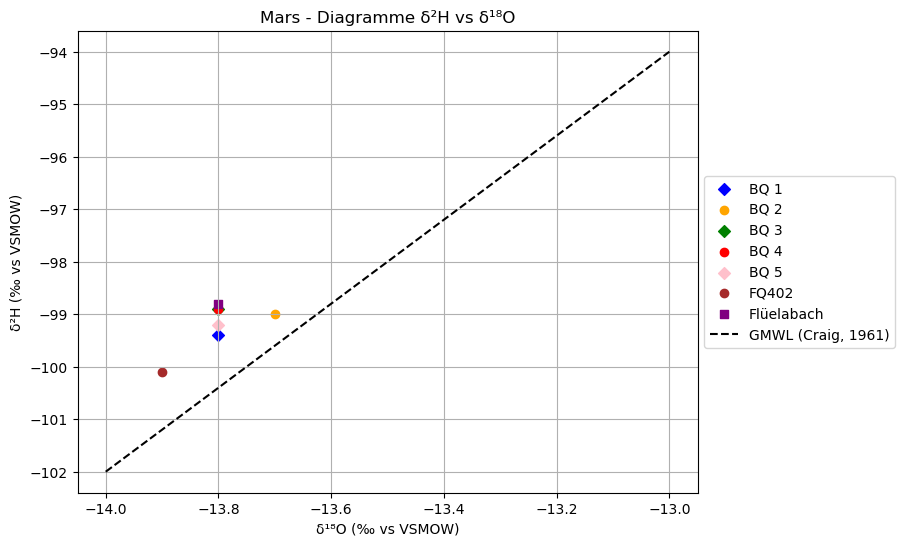

In [21]:
plt.figure(figsize=(8,6))

# Plot pour chaque source
plt.scatter(O18_bq1[4], H2_bq1[4], color='blue',marker='D', label="BQ 1")
plt.scatter(O18_bq2[4], H2_bq2[4], color='orange', label="BQ 2")
plt.scatter(O18_bq3[4], H2_bq3[4], color='green',marker='D', label="BQ 3")
plt.scatter(O18_bq4[4], H2_bq4[4], color='red', label="BQ 4")
plt.scatter(O18_bq5[4], H2_bq5[4], color='pink',marker='D', label="BQ 5")
plt.scatter(O18_fq402[4], H2_fq402[4], color='brown', label="FQ402")
plt.scatter(O18_fb[4], H2_fb[4], color='purple', marker='s', label="Flüelabach")

# Global Meteoric Water Line
x = np.linspace(-14.0, -13.0, 100)
plt.plot(x, 8*x + 10, 'k--', label='GMWL (Craig, 1961)')


plt.xlabel("δ¹⁸O (‰ vs VSMOW)")
plt.ylabel("δ²H (‰ vs VSMOW)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.title("Mars - Diagramme δ²H vs δ¹⁸O")

#plt.savefig('isotopes_nov-mars.png', dpi=300, bbox_inches='tight')
plt.show()

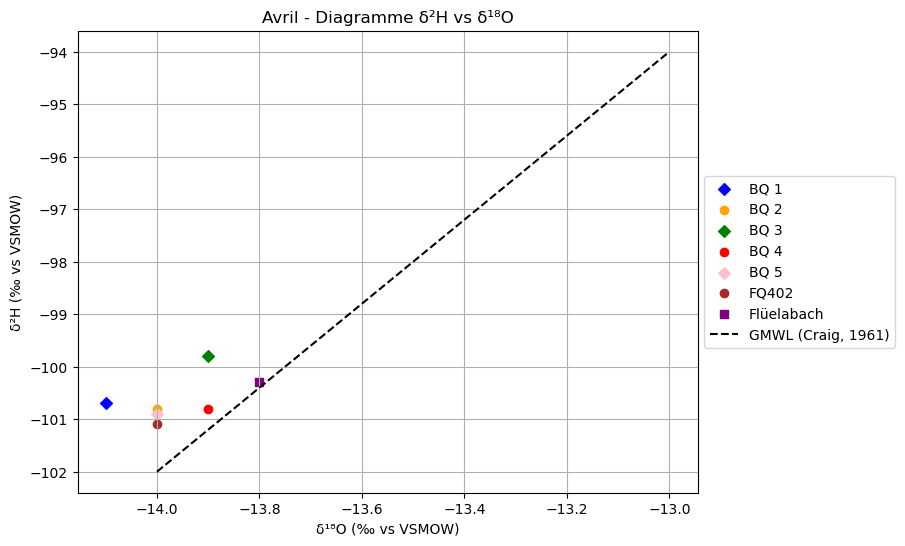

In [22]:
plt.figure(figsize=(8,6))

# Plot pour chaque source
plt.scatter(O18_bq1[5], H2_bq1[5], color='blue',marker='D', label="BQ 1")
plt.scatter(O18_bq2[5], H2_bq2[5], color='orange', label="BQ 2")
plt.scatter(O18_bq3[5], H2_bq3[5], color='green',marker='D', label="BQ 3")
plt.scatter(O18_bq4[5], H2_bq4[5], color='red', label="BQ 4")
plt.scatter(O18_bq5[5], H2_bq5[5], color='pink',marker='D', label="BQ 5")
plt.scatter(O18_fq402[5], H2_fq402[5], color='brown', label="FQ402")
plt.scatter(O18_fb[5], H2_fb[5], color='purple', marker='s', label="Flüelabach")

# Global Meteoric Water Line
x = np.linspace(-14.0, -13.0, 100)
plt.plot(x, 8*x + 10, 'k--', label='GMWL (Craig, 1961)')


plt.xlabel("δ¹⁸O (‰ vs VSMOW)")
plt.ylabel("δ²H (‰ vs VSMOW)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.title("Avril - Diagramme δ²H vs δ¹⁸O")

#plt.savefig('isotopes_nov-mars.png', dpi=300, bbox_inches='tight')
plt.show()

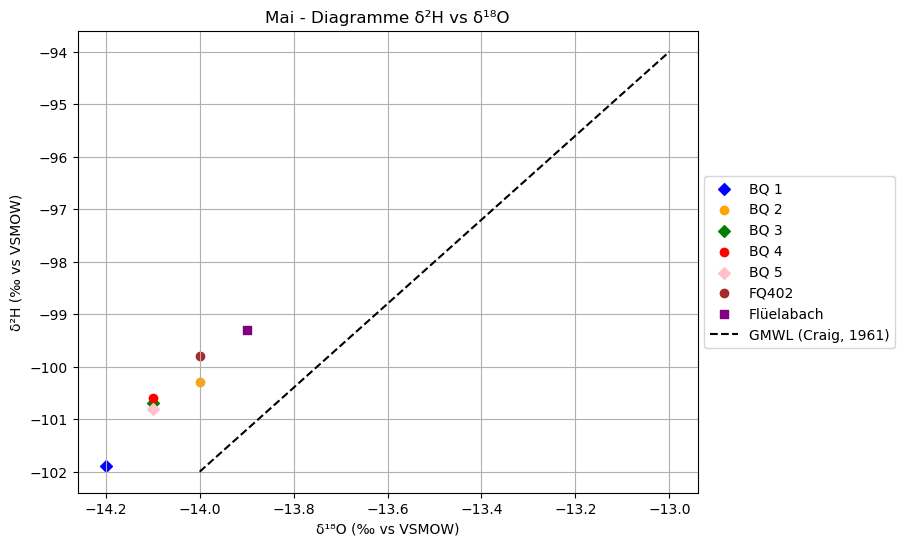

In [23]:
plt.figure(figsize=(8,6))

# Plot pour chaque source
plt.scatter(O18_bq1[6], H2_bq1[6], color='blue',marker='D', label="BQ 1")
plt.scatter(O18_bq2[6], H2_bq2[6], color='orange', label="BQ 2")
plt.scatter(O18_bq3[6], H2_bq3[6], color='green',marker='D', label="BQ 3")
plt.scatter(O18_bq4[6], H2_bq4[6], color='red', label="BQ 4")
plt.scatter(O18_bq5[6], H2_bq5[6], color='pink',marker='D', label="BQ 5")
plt.scatter(O18_fq402[6], H2_fq402[6], color='brown', label="FQ402")
plt.scatter(O18_fb[6], H2_fb[6], color='purple', marker='s', label="Flüelabach")

# Global Meteoric Water Line
x = np.linspace(-14.0, -13.0, 100)
plt.plot(x, 8*x + 10, 'k--', label='GMWL (Craig, 1961)')


plt.xlabel("δ¹⁸O (‰ vs VSMOW)")
plt.ylabel("δ²H (‰ vs VSMOW)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.title("Mai - Diagramme δ²H vs δ¹⁸O")

#plt.savefig('isotopes_nov-mars.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\axela\AppData\Local\Temp\ipykernel_20512\3147263884.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


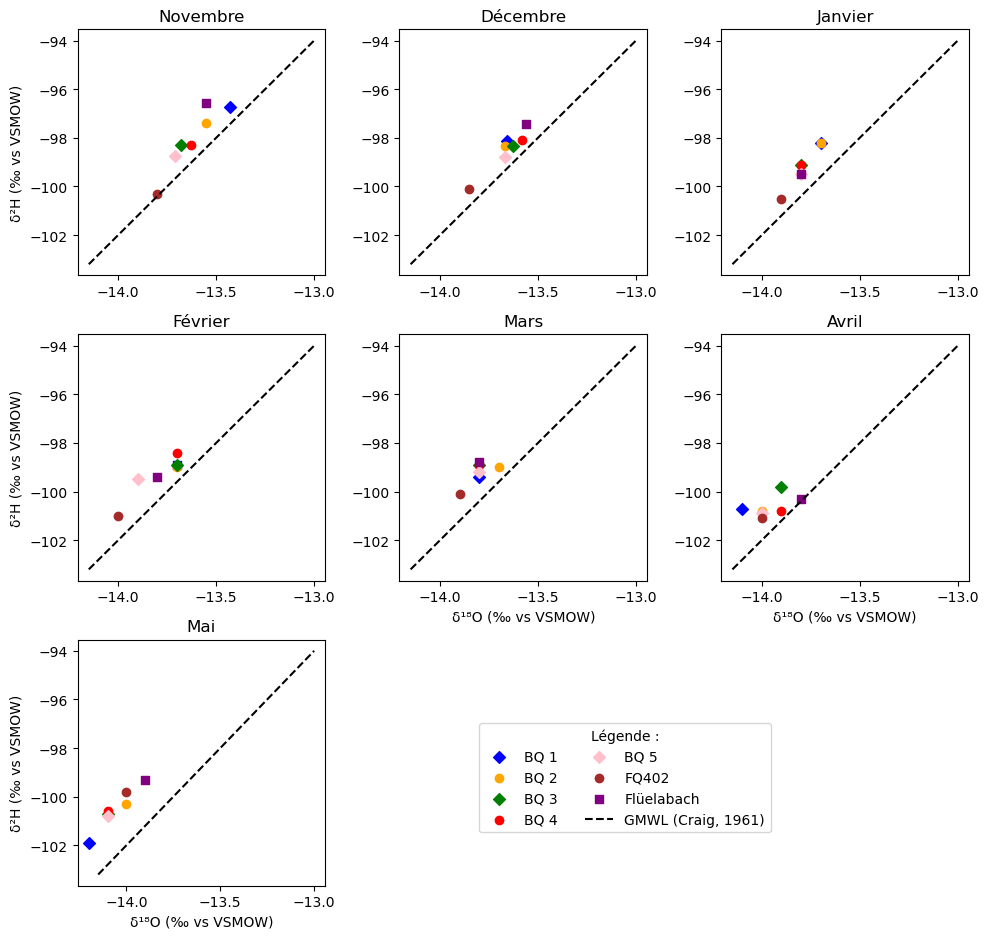

In [24]:
fig,axes = plt.subplots(3, 3, figsize=(10,9.5))

# Global Meteoric Water Line
x = np.linspace(-14.15, -13.0, 100)

# Supprimer les cases inutilisées
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

#Novembre
axes[0, 0].scatter(O18_bq1[0], H2_bq1[0], color='blue', marker='D', label="BQ 1")
axes[0, 0].scatter(O18_bq2[0], H2_bq2[0], color='orange', label="BQ 2")
axes[0, 0].scatter(O18_bq3[0], H2_bq3[0], color='green', marker='D', label="BQ 3")
axes[0, 0].scatter(O18_bq4[0], H2_bq4[0], color='red', label="BQ 4")
axes[0, 0].scatter(O18_bq5[0], H2_bq5[0], color='pink', marker='D', label="BQ 5")
axes[0, 0].scatter(O18_fq402[0], H2_fq402[0], color='brown', label="FQ402")
axes[0, 0].scatter(O18_fb[0], H2_fb[0], color='purple', marker='s', label="Flüelabach")
axes[0, 0].plot(x, 8*x + 10, 'k--', label='GMWL (Craig, 1961)')
axes[0, 0].set_ylabel("δ²H (‰ vs VSMOW)")
axes[0, 0].set_title('Novembre')

#Décembre
axes[0, 1].scatter(O18_bq1[1], H2_bq1[1], color='blue', marker='D')
axes[0, 1].scatter(O18_bq2[1], H2_bq2[1], color='orange')
axes[0, 1].scatter(O18_bq3[1], H2_bq3[1], color='green', marker='D')
axes[0, 1].scatter(O18_bq4[1], H2_bq4[1], color='red')
axes[0, 1].scatter(O18_bq5[1], H2_bq5[1], color='pink', marker='D')
axes[0, 1].scatter(O18_fq402[1], H2_fq402[1], color='brown')
axes[0, 1].scatter(O18_fb[1], H2_fb[1], color='purple', marker='s')
axes[0, 1].plot(x, 8*x + 10, 'k--')
axes[0, 1].set_title('Décembre')

#Janvier
axes[0, 2].scatter(O18_bq1[2], H2_bq1[2], color='blue', marker='D')
axes[0, 2].scatter(O18_bq2[2], H2_bq2[2], color='orange')
axes[0, 2].scatter(O18_bq3[2], H2_bq3[2], color='green', marker='D')
axes[0, 2].scatter(O18_bq4[2], H2_bq4[2], color='red')
axes[0, 2].scatter(O18_bq5[2], H2_bq5[2], color='pink', marker='D')
axes[0, 2].scatter(O18_fq402[2], H2_fq402[2], color='brown')
axes[0, 2].scatter(O18_fb[2], H2_fb[2], color='purple', marker='s')
axes[0, 2].plot(x, 8*x + 10, 'k--')
axes[0, 2].set_title('Janvier')

#Février
axes[1, 0].scatter(O18_bq1[3], H2_bq1[3], color='blue', marker='s')
axes[1, 0].scatter(O18_bq2[3], H2_bq2[3], color='orange')
axes[1, 0].scatter(O18_bq3[3], H2_bq3[3], color='green', marker='D')
axes[1, 0].scatter(O18_bq4[3], H2_bq4[3], color='red')
axes[1, 0].scatter(O18_bq5[3], H2_bq5[3], color='pink', marker='D')
axes[1, 0].scatter(O18_fq402[3], H2_fq402[3], color='brown')
axes[1, 0].scatter(O18_fb[3], H2_fb[3], color='purple', marker='s')
axes[1, 0].plot(x, 8*x + 10, 'k--')
axes[1, 0].set_ylabel("δ²H (‰ vs VSMOW)")
axes[1, 0].set_title('Février')

#Mars
axes[1, 1].scatter(O18_bq1[4], H2_bq1[4], color='blue', marker='D')
axes[1, 1].scatter(O18_bq2[4], H2_bq2[4], color='orange')
axes[1, 1].scatter(O18_bq3[4], H2_bq3[4], color='green', marker='D')
axes[1, 1].scatter(O18_bq4[4], H2_bq4[4], color='red')
axes[1, 1].scatter(O18_bq5[4], H2_bq5[4], color='pink', marker='D')
axes[1, 1].scatter(O18_fq402[4], H2_fq402[4], color='brown')
axes[1, 1].scatter(O18_fb[4], H2_fb[4], color='purple', marker='s')
axes[1, 1].plot(x, 8*x + 10, 'k--')
axes[1, 1].set_xlabel("δ¹⁸O (‰ vs VSMOW)")
axes[1, 1].set_title('Mars')

#Avril
axes[1, 2].scatter(O18_bq1[5], H2_bq1[5], color='blue', marker='D')
axes[1, 2].scatter(O18_bq2[5], H2_bq2[5], color='orange')
axes[1, 2].scatter(O18_bq3[5], H2_bq3[5], color='green', marker='D')
axes[1, 2].scatter(O18_bq4[5], H2_bq4[5], color='red')
axes[1, 2].scatter(O18_bq5[5], H2_bq5[5], color='pink', marker='D')
axes[1, 2].scatter(O18_fq402[5], H2_fq402[5], color='brown')
axes[1, 2].scatter(O18_fb[5], H2_fb[5], color='purple', marker='s')
axes[1, 2].plot(x, 8*x + 10, 'k--')
axes[1, 2].set_xlabel("δ¹⁸O (‰ vs VSMOW)")
axes[1, 2].set_title('Avril')

#Mai
axes[2, 0].scatter(O18_bq1[6], H2_bq1[6], color='blue', marker='D')
axes[2, 0].scatter(O18_bq2[6], H2_bq2[6], color='orange')
axes[2, 0].scatter(O18_bq3[6], H2_bq3[6], color='green', marker='D')
axes[2, 0].scatter(O18_bq4[6], H2_bq4[6], color='red')
axes[2, 0].scatter(O18_bq5[6], H2_bq5[6], color='pink', marker='D')
axes[2, 0].scatter(O18_fq402[6], H2_fq402[6], color='brown')
axes[2, 0].scatter(O18_fb[6], H2_fb[6], color='purple', marker='s')
axes[2, 0].plot(x, 8*x + 10, 'k--')
axes[2, 0].set_xlabel("δ¹⁸O (‰ vs VSMOW)")
axes[2, 0].set_ylabel("δ²H (‰ vs VSMOW)")
axes[2, 0].set_title('Mai')

ax_legende = fig.add_axes([0.50, 0.06, 0.26, 0.18])  # à ajuster selon ta mise en page
ax_legende.axis('off')  # cacher les axes

# Récupérer les handles une fois
handles, labels = axes[0, 0].get_legend_handles_labels()

# Afficher la légende dans l'axe vide
ax_legende.legend(handles, labels, loc='center', frameon=False)

# Afficher la légende avec encadrement, titre et colonnes
ax_legende.legend(
    handles,
    labels,
    loc='upper center',
    frameon=True,
    ncol=2,
    title='Légende :'
)

plt.tight_layout()
#plt.savefig('evolution_isotopes_3x3.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
# Silice 
dates_mesures_sio2 = np.array(['2024-11-04', '2024-12-16', '2025-01-13', '2025-03-14', '2025-04-23', '2025-05-19'], dtype='datetime64[D]')

sio2_bq1 = np.array([3.88, 4.30, 3.9, 4.5, 4.3, 4.2])
sio2_bq4 = np.array([4.36, 4.30, 4.2, 4.8, 3.8, 4.1])
sio2_fb = np.array([3.20, 3.90, 4.2, 3.7, 3.9, 4.3])
sio2_fq402 = np.array([5.24, 5.30, 5.7, 5.7, 5.9, 5.3])


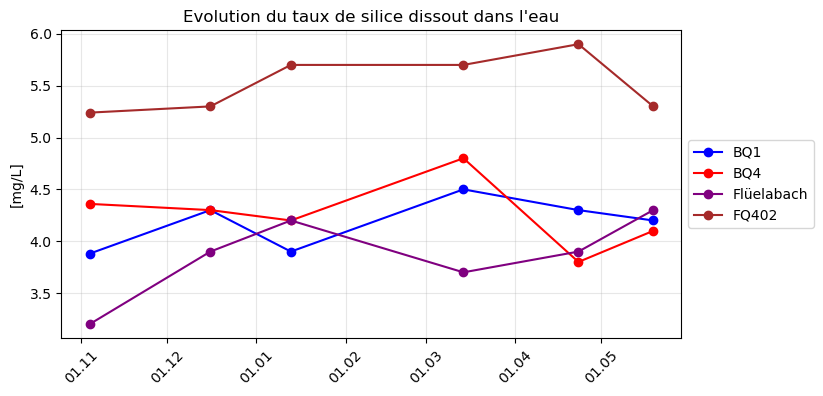

In [26]:
plt.figure(figsize=(8,4))

plt.plot(dates_mesures_sio2, sio2_bq1, marker = 'o', color='blue', label='BQ1')
plt.plot(dates_mesures_sio2, sio2_bq4, marker = 'o', color='red', label='BQ4')
plt.plot(dates_mesures_sio2, sio2_fb, marker = 'o', color='purple', label='Flüelabach')
plt.plot(dates_mesures_sio2, sio2_fq402, marker = 'o', color='brown', label='FQ402')


# Formater les dates sur l'axe x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
plt.gca().tick_params(axis='x', rotation=45)
plt.gca().xaxis.set_tick_params(labelbottom=True)

plt.ylabel("[mg/L]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Evolution du taux de silice dissout dans l\'eau')

plt.grid(alpha=0.3)
#plt.savefig('evolution_silice.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
# Anions

#Nitrates
no3_bq1 = np.array([0.75, 0.83, 0.94, 0.86, 0.81, 1.38, 1.06])
no3_bq2 = np.array([0.74, 0.75, 0.94, 0.89, 0.82, 1.33, 1.23])
no3_bq3 = np.array([0.89, 0.85, 1.03, 0.99, 0.95, 1.83, 1.65])
no3_bq4 = np.array([1.15, 1.13, 1.13, 1.19, 1.15, 3.91, 2.81])
no3_bq5 = np.array([0.94, 1.02, 1.13, 1.03, 1.07, 2.36, 1.94])
no3_fb = np.array([0.61, 0.82, 0.92, 0.78, 0.85, 0.75, 0.65])
no3_fq402 = np.array([0.68, 0.76, 0.89, 0.82, 0.94, 1.01, 1.09])

#Chlorure
cl_bq1 = np.array([0.85, 0.91, 1.03, 0.95, 1.56, 1.42, 0.82])
cl_bq2 = np.array([1.20, 1.06, 0.93, 1.11, 1.32, 1.39, 0.87])
cl_bq3 = np.array([1.08, 1.13, 1.06, 0.94, 1.14, 1.16, 0.80])
cl_bq4 = np.array([0.53, 0.82, 0.79, 0.99, 1.06, 0.57, 0.44])
cl_bq5 = np.array([1.11, 1.14, 1.01, 1.17, 1.15, 0.96, 0.68])
cl_fb = np.array([0.89, 1.00, 0.90, 1.06, 1.73, 1.68, 1.17])
cl_fq402 = np.array([0.20, 1.46, 0.51, 2.98, 0.66, 1.31, 0.71])

#Sulfate
so4_bq1 = np.array([13.79, 12.11, 10.97, 10.47, 10.27, 8.27, 7.88])
so4_bq2 = np.array([12.98, 12.29, 10.92, 10.38, 10.29, 8.75, 7.90])
so4_bq3 = np.array([12.23, 12.15, 11.10, 10.77, 10.56, 9.00, 8.36])
so4_bq4 = np.array([10.29, 10.75, 10.14, 9.94, 9.79, 6.15, 6.44])
so4_bq5 = np.array([11.53, 12.13, 10.99, 10.98, 10.97, 8.79, 7.87])
so4_fb = np.array([14.76, 12.02, 10.73, 10.12, 10.15, 8.20, 10.64])
so4_fq402 = np.array([18.39, 18.39, 16.18, 15.38, 14.57, 15.14, 19.47])

In [28]:
# Cations

#Sodium
na_bq1 = np.array([1.10, 1.47, 1.66, 1.58, 1.67, 1.77, 1.59])
na_bq2 = np.array([0.89, 1.56, 1.60, 1.64, 1.68, 1.74, 1.60])
na_bq3 = np.array([0.89, 1.70, 1.67, 1.60, 1.66, 1.68, 1.52])
na_bq4 = np.array([0.96, 1.33, 1.46, 1.45, 2.19, 1.33, 1.11])
na_bq5 = np.array([1.07, 1.66, 1.67, 1.72, 1.68, 1.66, 1.49])
na_fb = np.array([0.99, 1.62, 1.69, 1.88, 2.03, 1.76, 1.46])
na_fq402 = np.array([1.00, 1.98, 1.63, 1.94, 1.90, 1.87, 1.61])

#Potassium
k_bq1 = np.array([0.50, 0.45, 0.48, 0.49, 0.67, 0.48, 0.47])
k_bq2 = np.array([0.81, 0.49, 0.48, 0.65, 0.55, 0.49, 0.48])
k_bq3 = np.array([0.57, 0.65, 0.60, 0.54, 0.54, 0.58, 0.59])
k_bq4 = np.array([0.85, 0.52, 0.51, 0.64, 0.62, 0.48, 0.48])
k_bq5 = np.array([0.82, 0.62, 0.59, 0.61, 0.60, 0.58, 0.62])
k_fb = np.array([0.88, 0.49, 0.46, 0.47, 0.49, 0.43, 0.40])
k_fq402 = np.array([0.67, 1.01, 0.85, 3.80, 0.85, 0.84, 0.76])

#Magnésium
mg_bq1 = np.array([1.52, 1.50, 1.46, 1.43, 1.45, 1.38, 1.31])
mg_bq2 = np.array([1.96, 1.50, 1.46, 1.44, 1.45, 1.37, 1.30])
mg_bq3 = np.array([2.02, 1.63, 1.56, 1.52, 1.55, 1.55, 1.53])
mg_bq4 = np.array([2.26, 1.95, 1.84, 1.81, 1.87, 1.71, 1.72])
mg_bq5 = np.array([1.87, 1.77, 1.71, 1.68, 1.69, 1.69, 1.67])
mg_fb = np.array([2.41, 1.52, 1.51, 1.43, 1.45, 1.21, 1.29])
mg_fq402 = np.array([1.31, 1.55, 1.59, 1.64, 1.67, 1.61, 1.48])

#Calcium
ca_bq1 = np.array([8.32, 8.26, 7.92, 7.81, 8.00, 7.59, 7.17])
ca_bq2 = np.array([7.39, 8.14, 7.90, 7.89, 7.85, 7.39, 6.98])
ca_bq3 = np.array([7.91, 8.46, 7.92, 7.80, 8.01, 7.74, 7.33])
ca_bq4 = np.array([9.76, 7.99, 7.80, 7.57, 12.37, 7.09, 6.84])
ca_bq5 = np.array([10.19, 8.16, 7.88, 7.91, 8.02, 7.90, 7.64])
ca_fb = np.array([8.92, 8.86, 8.88, 8.53, 8.82, 7.33, 7.48])
ca_fq402 = np.array([7.04, 8.32, 8.39, 8.75, 8.86, 8.35, 7.79])

C:\Users\axela\AppData\Local\Temp\ipykernel_20512\1324950026.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


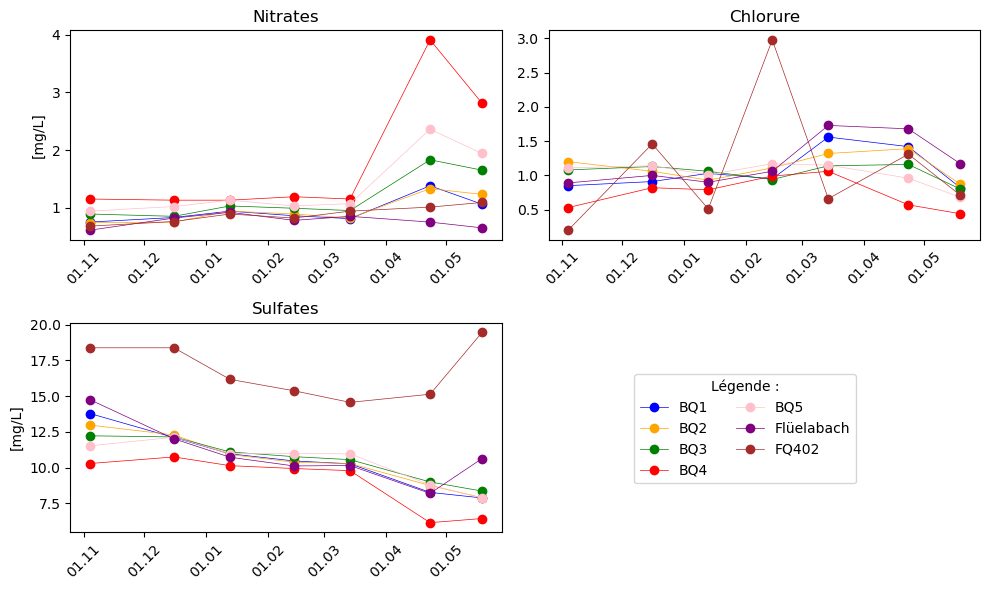

In [29]:
#Anions

fig,axes = plt.subplots(2, 2, figsize=(10,6))

fig.delaxes(axes[1, 1])

axes[0, 0].plot(dates_mesures, no3_bq1, marker='o', lw=0.5, color='blue', label='BQ1')
axes[0, 0].plot(dates_mesures, no3_bq2, marker='o', lw=0.5, color='orange', label='BQ2')
axes[0, 0].plot(dates_mesures, no3_bq3, marker='o', lw=0.5, color='green', label='BQ3')
axes[0, 0].plot(dates_mesures, no3_bq4, marker='o', lw=0.5, color='red', label='BQ4')
axes[0, 0].plot(dates_mesures, no3_bq5, marker='o', lw=0.5, color='pink', label='BQ5')
axes[0, 0].plot(dates_mesures, no3_fb, marker='o', lw=0.5, color='purple', label='Flüelabach')
axes[0, 0].plot(dates_mesures, no3_fq402, marker='o', lw=0.5, color='brown', label='FQ402')
axes[0, 0].set_title('Nitrates')
axes[0, 0].set_ylabel('[mg/L]')

axes[0, 1].plot(dates_mesures, cl_bq1, marker='o', lw=0.5, color='blue', label='BQ1')
axes[0, 1].plot(dates_mesures, cl_bq2, marker='o', lw=0.5, color='orange', label='BQ2')
axes[0, 1].plot(dates_mesures, cl_bq3, marker='o', lw=0.5, color='green', label='BQ3')
axes[0, 1].plot(dates_mesures, cl_bq4, marker='o', lw=0.5, color='red', label='BQ4')
axes[0, 1].plot(dates_mesures, cl_bq5, marker='o', lw=0.5, color='pink', label='BQ5')
axes[0, 1].plot(dates_mesures, cl_fb, marker='o', lw=0.5, color='purple', label='Flüelabach')
axes[0, 1].plot(dates_mesures, cl_fq402, marker='o', lw=0.5, color='brown', label='FQ402')
axes[0, 1].set_title('Chlorure')


axes[1, 0].plot(dates_mesures, so4_bq1, marker='o', lw=0.5, color='blue', label='BQ1')
axes[1, 0].plot(dates_mesures, so4_bq2, marker='o', lw=0.5, color='orange', label='BQ2')
axes[1, 0].plot(dates_mesures, so4_bq3, marker='o', lw=0.5, color='green', label='BQ3')
axes[1, 0].plot(dates_mesures, so4_bq4, marker='o', lw=0.5, color='red', label='BQ4')
axes[1, 0].plot(dates_mesures, so4_bq5, marker='o', lw=0.5, color='pink', label='BQ5')
axes[1, 0].plot(dates_mesures, so4_fb, marker='o', lw=0.5, color='purple', label='Flüelabach')
axes[1, 0].plot(dates_mesures, so4_fq402, marker='o', lw=0.5, color='brown', label='FQ402')
axes[1, 0].set_title('Sulfates')
axes[1, 0].set_ylabel('[mg/L]')


for ax in axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
    ax.tick_params(axis='x', rotation=45)
    ax.xaxis.set_tick_params(labelbottom=True)

ax_legende = fig.add_axes([0.62, 0.2, 0.26, 0.18])  # à ajuster selon ta mise en page
ax_legende.axis('off')  # cacher les axes

# Récupérer les handles une fois
handles, labels = axes[0, 0].get_legend_handles_labels()

# Afficher la légende dans l'axe vide
ax_legende.legend(handles, labels, loc='center', frameon=False)

# Afficher la légende avec encadrement, titre et colonnes
ax_legende.legend(
    handles,
    labels,
    loc='upper center',
    frameon=True,
    ncol=2,
    title='Légende :'
)


plt.tight_layout()
#plt.savefig('evolution_anions.png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\axela\AppData\Local\Temp\ipykernel_20512\2707071286.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


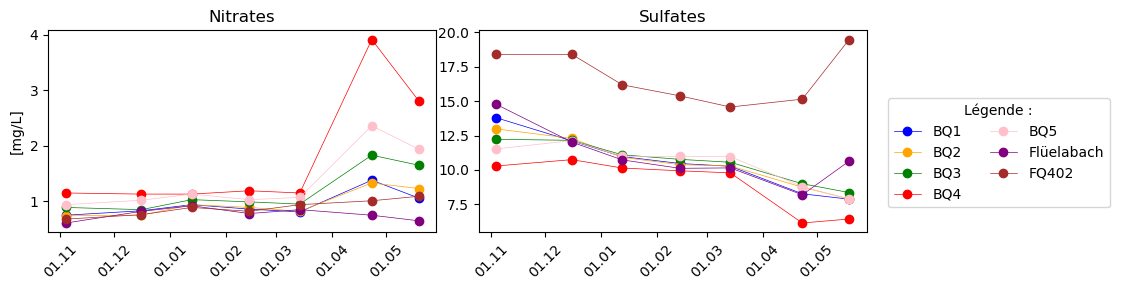

In [37]:
#Anions

fig,axes = plt.subplots(1, 2, figsize=(9,3))

#fig.delaxes(axes[1, 1])

axes[0].plot(dates_mesures, no3_bq1, marker='o', lw=0.5, color='blue', label='BQ1')
axes[0].plot(dates_mesures, no3_bq2, marker='o', lw=0.5, color='orange', label='BQ2')
axes[0].plot(dates_mesures, no3_bq3, marker='o', lw=0.5, color='green', label='BQ3')
axes[0].plot(dates_mesures, no3_bq4, marker='o', lw=0.5, color='red', label='BQ4')
axes[0].plot(dates_mesures, no3_bq5, marker='o', lw=0.5, color='pink', label='BQ5')
axes[0].plot(dates_mesures, no3_fb, marker='o', lw=0.5, color='purple', label='Flüelabach')
axes[0].plot(dates_mesures, no3_fq402, marker='o', lw=0.5, color='brown', label='FQ402')
axes[0].set_title('Nitrates')
axes[0].set_ylabel('[mg/L]')


axes[1].plot(dates_mesures, so4_bq1, marker='o', lw=0.5, color='blue', label='BQ1')
axes[1].plot(dates_mesures, so4_bq2, marker='o', lw=0.5, color='orange', label='BQ2')
axes[1].plot(dates_mesures, so4_bq3, marker='o', lw=0.5, color='green', label='BQ3')
axes[1].plot(dates_mesures, so4_bq4, marker='o', lw=0.5, color='red', label='BQ4')
axes[1].plot(dates_mesures, so4_bq5, marker='o', lw=0.5, color='pink', label='BQ5')
axes[1].plot(dates_mesures, so4_fb, marker='o', lw=0.5, color='purple', label='Flüelabach')
axes[1].plot(dates_mesures, so4_fq402, marker='o', lw=0.5, color='brown', label='FQ402')
axes[1].set_title('Sulfates')
#axes[1].set_ylabel('[mg/L]')


for ax in axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
    ax.tick_params(axis='x', rotation=45)
    ax.xaxis.set_tick_params(labelbottom=True)

ax_legende = fig.add_axes([1, 0.5, 0.26, 0.18])  # à ajuster selon ta mise en page
ax_legende.axis('off')  # cacher les axes

# Récupérer les handles une fois
handles, labels = axes[0].get_legend_handles_labels()

# Afficher la légende dans l'axe vide
ax_legende.legend(handles, labels, loc='center', frameon=False)

# Afficher la légende avec encadrement, titre et colonnes
ax_legende.legend(
    handles,
    labels,
    loc='upper center',
    frameon=True,
    ncol=2,
    title='Légende :'
)


plt.tight_layout()
plt.savefig('evolution_nitrates_sulfates.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\axela\AppData\Local\Temp\ipykernel_21960\852538008.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


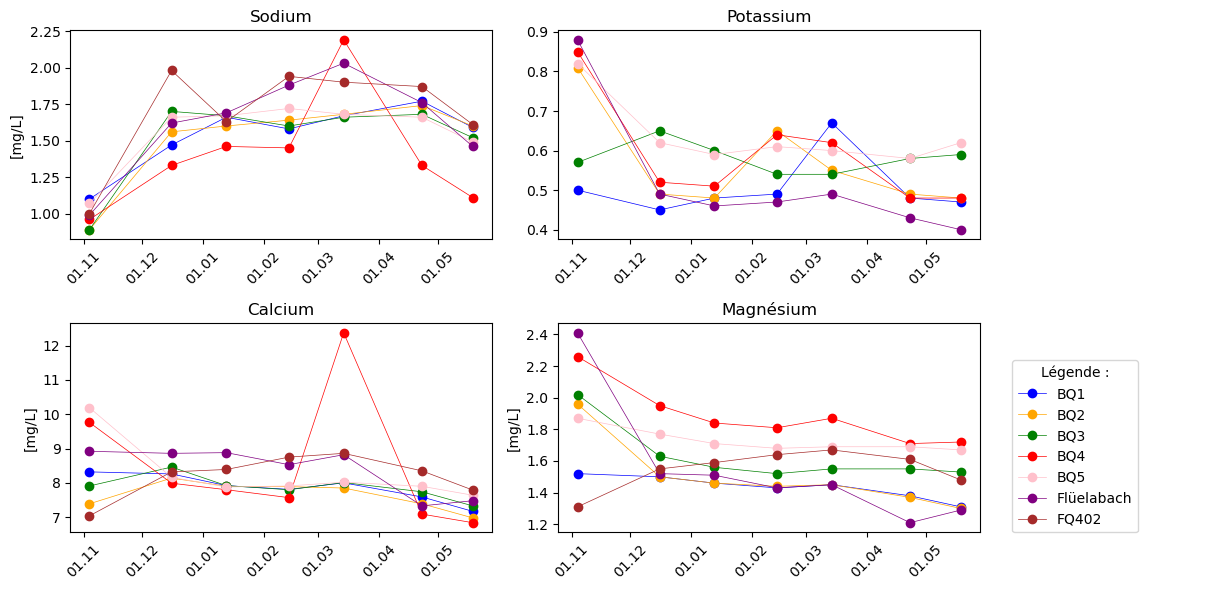

In [ ]:
#Cations

fig,axes = plt.subplots(2, 2, figsize=(10,6))

#sodium
axes[0, 0].plot(dates_mesures, na_bq1, marker='o', lw=0.5, color='blue', label='BQ1')
axes[0, 0].plot(dates_mesures, na_bq2, marker='o', lw=0.5, color='orange', label='BQ2')
axes[0, 0].plot(dates_mesures, na_bq3, marker='o', lw=0.5, color='green', label='BQ3')
axes[0, 0].plot(dates_mesures, na_bq4, marker='o', lw=0.5, color='red', label='BQ4')
axes[0, 0].plot(dates_mesures, na_bq5, marker='o', lw=0.5, color='pink', label='BQ5')
axes[0, 0].plot(dates_mesures, na_fb, marker='o', lw=0.5, color='purple', label='Flüelabach')
axes[0, 0].plot(dates_mesures, na_fq402, marker='o', lw=0.5, color='brown', label='FQ402')
axes[0, 0].set_title('Sodium')
axes[0, 0].set_ylabel('[mg/L]')

#potassium
axes[0, 1].plot(dates_mesures, k_bq1, marker='o', lw=0.5, color='blue', label='BQ1')
axes[0, 1].plot(dates_mesures, k_bq2, marker='o', lw=0.5, color='orange', label='BQ2')
axes[0, 1].plot(dates_mesures, k_bq3, marker='o', lw=0.5, color='green', label='BQ3')
axes[0, 1].plot(dates_mesures, k_bq4, marker='o', lw=0.5, color='red', label='BQ4')
axes[0, 1].plot(dates_mesures, k_bq5, marker='o', lw=0.5, color='pink', label='BQ5')
axes[0, 1].plot(dates_mesures, k_fb, marker='o', lw=0.5, color='purple', label='Flüelabach')
#axes[0, 1].plot(dates_mesures, k_fq402, marker='o', lw=0.5, color='brown', label='FQ402')
axes[0, 1].set_title('Potassium')

#calcium
axes[1, 0].plot(dates_mesures, ca_bq1, marker='o', lw=0.5, color='blue', label='BQ1')
axes[1, 0].plot(dates_mesures, ca_bq2, marker='o', lw=0.5, color='orange', label='BQ2')
axes[1, 0].plot(dates_mesures, ca_bq3, marker='o', lw=0.5, color='green', label='BQ3')
axes[1, 0].plot(dates_mesures, ca_bq4, marker='o', lw=0.5, color='red', label='BQ4')
axes[1, 0].plot(dates_mesures, ca_bq5, marker='o', lw=0.5, color='pink', label='BQ5')
axes[1, 0].plot(dates_mesures, ca_fb, marker='o', lw=0.5, color='purple', label='Flüelabach')
axes[1, 0].plot(dates_mesures, ca_fq402, marker='o', lw=0.5, color='brown', label='FQ402')
axes[1, 0].set_title('Calcium')
axes[1, 0].set_ylabel('[mg/L]')

axes[1, 1].plot(dates_mesures, mg_bq1, marker='o', lw=0.5, color='blue', label='BQ1')
axes[1, 1].plot(dates_mesures, mg_bq2, marker='o', lw=0.5, color='orange', label='BQ2')
axes[1, 1].plot(dates_mesures, mg_bq3, marker='o', lw=0.5, color='green', label='BQ3')
axes[1, 1].plot(dates_mesures, mg_bq4, marker='o', lw=0.5, color='red', label='BQ4')
axes[1, 1].plot(dates_mesures, mg_bq5, marker='o', lw=0.5, color='pink', label='BQ5')
axes[1, 1].plot(dates_mesures, mg_fb, marker='o', lw=0.5, color='purple', label='Flüelabach')
axes[1, 1].plot(dates_mesures, mg_fq402, marker='o', lw=0.5, color='brown', label='FQ402')
axes[1, 1].set_title('Magnésium')
axes[1, 1].set_ylabel('[mg/L]')


for ax in axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
    ax.tick_params(axis='x', rotation=45)
    ax.xaxis.set_tick_params(labelbottom=True)

ax_legende = fig.add_axes([0.95, 0.223, 0.26, 0.18])  # à ajuster selon ta mise en page
ax_legende.axis('off')  # cacher les axes

# Récupérer les handles une fois
handles, labels = axes[0, 0].get_legend_handles_labels()

# Afficher la légende dans l'axe vide
ax_legende.legend(handles, labels, loc='center', frameon=False)

# Afficher la légende avec encadrement, titre et colonnes
ax_legende.legend(
    handles,
    labels,
    loc='upper center',
    frameon=True,
    ncol=1,
    title='Légende :'
)


plt.tight_layout()
#plt.savefig('evolution_cations.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#données TAC
tac_bq1 = np.array([24, 26, 30, 26, 28, 27, 27])
tac_bq2 = np.array([28, 25, 28, 27, 26, 24, 26])
tac_bq3 = np.array([28, 27, 27, 28, 27, 26, 26])
tac_bq4 = np.array([31, 27, 30, 29, 27, 25, 27])
tac_bq5 = np.array([28, 29, 28, 29, 26, 27, 30])
tac_fb = np.array([34, 28, 31, 29, 28, 25, 24])
tac_fq402 = np.array([16, 20, 23, 25, 27, 23, 17])

tac_bd901 = np.array([])
tac_bd505 = np.array([])

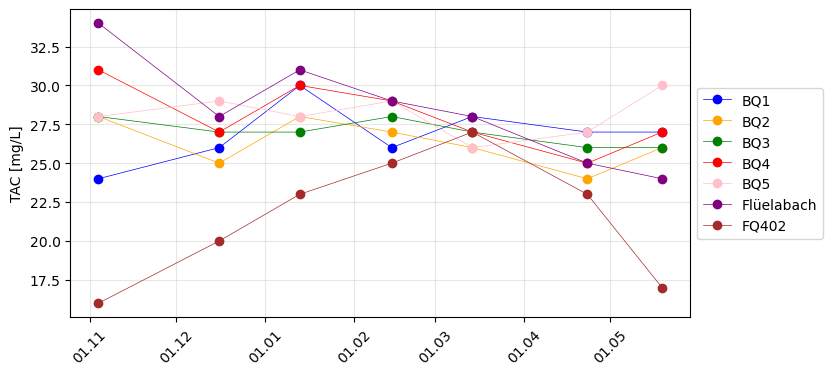

In [ ]:
plt.figure(figsize=(8,4))

plt.plot(dates_mesures, tac_bq1, marker = 'o', color='blue', lw=0.5, label='BQ1')
plt.plot(dates_mesures, tac_bq2, marker = 'o', color='orange', lw=0.5, label='BQ2')
plt.plot(dates_mesures, tac_bq3, marker = 'o', color='green', lw=0.5, label='BQ3')
plt.plot(dates_mesures, tac_bq4, marker = 'o', color='red', lw=0.5, label='BQ4')
plt.plot(dates_mesures, tac_bq5, marker = 'o', color='pink', lw=0.5, label='BQ5')
plt.plot(dates_mesures, tac_fb, marker = 'o', color='purple', lw=0.5, label='Flüelabach')
plt.plot(dates_mesures, tac_fq402, marker = 'o', color='brown', lw=0.5, label='FQ402')


# Formater les dates sur l'axe x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
plt.gca().tick_params(axis='x', rotation=45)
plt.gca().xaxis.set_tick_params(labelbottom=True)

plt.ylabel("TAC [mg/L]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title('Evolution du titre al dans l\'eau')

plt.grid(alpha=0.3)
#plt.savefig('evolution_tac.png', dpi=300, bbox_inches='tight')
plt.show()